In [0]:
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt 
import sklearn 
from pandas import Series, DataFrame 
from pylab import rcParams 
from sklearn import preprocessing 
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics 
from sklearn.metrics import classification_report 

In [0]:
Url="https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"


In [0]:

titanic = pd.read_csv(Url) 

In [290]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [291]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [292]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [293]:
titanic.shape

(891, 12)

In [294]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [295]:
(titanic['Sex']=='Female').count()

891

In [296]:
titanic[(titanic['Sex']=='female') & (titanic['Survived']==1)].head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [297]:
titanic=titanic.drop(['PassengerId','Pclass','Name','Ticket','Cabin','Embarked'],axis=1)
titanic.head(5)

,Survived,Sex,Age,SibSp,Parch,Fare
0,0,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,1,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,0,male,35.0,0,0,8.0500


In [298]:
#pd.get_dummies(titanic,columns=['Sex'])
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
titanic["Gender"] = lb_make.fit_transform(titanic["Sex"])
titanic[['Sex',"Gender"]].head(11)


,Sex,Gender
0,male,1
1,female,0
2,female,0
3,female,0
4,male,1
5,male,1
6,male,1
7,male,1
8,female,0
9,female,0


In [0]:
titanic=titanic.drop(['Sex'],axis=1)

In [300]:
titanic.isnull().sum()

Survived      0
Age         177
SibSp         0
Parch         0
Fare          0
Gender        0
dtype: int64

In [301]:
pd.set_option('display.max_rows', None)
(titanic.Age).head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [0]:
titanic['Age'].fillna((titanic['Age'].mean()),inplace=True)

In [303]:
titanic.isnull().sum()

Survived    0
Age         0
SibSp       0
Parch       0
Fare        0
Gender      0
dtype: int64

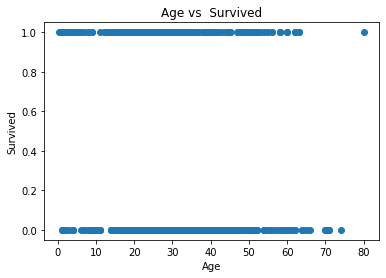

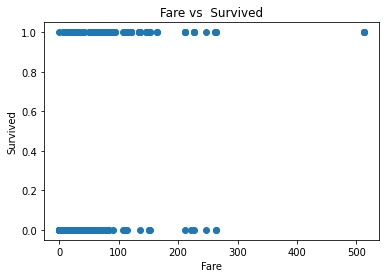

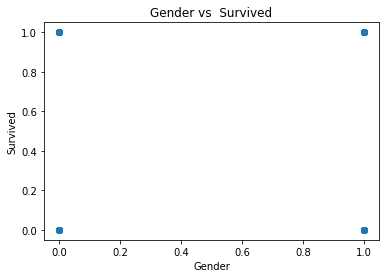

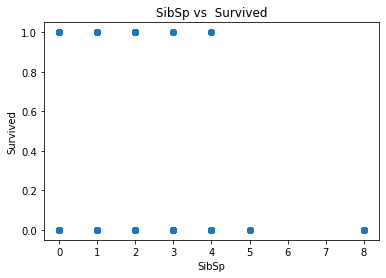

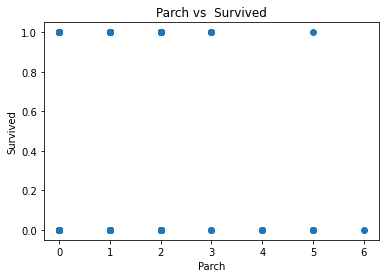

In [304]:
plt.scatter(titanic.Age,titanic.Survived)
plt.title("Age vs  Survived")
plt.xlabel("Age")
plt.ylabel("Survived")
plt.show()

plt.scatter(titanic.Fare,titanic.Survived)
plt.title("Fare vs  Survived")
plt.xlabel("Fare")
plt.ylabel("Survived")
plt.show()

plt.scatter(titanic.Gender,titanic.Survived)
plt.title("Gender vs  Survived")
plt.xlabel("Gender")
plt.ylabel("Survived")
plt.show()

plt.scatter(titanic.SibSp,titanic.Survived)
plt.title("SibSp vs  Survived")
plt.xlabel("SibSp")
plt.ylabel("Survived")
plt.show()

plt.scatter(titanic.Parch,titanic.Survived)
plt.title("Parch vs  Survived")
plt.xlabel("Parch")
plt.ylabel("Survived")
plt.show()


In [0]:
#Removing the outlier which having fair greate than 300
titanic=titanic[~(titanic['Fare']>300)]
titanic=titanic[~(titanic['SibSp']>7)]

In [306]:
titanic.shape

(881, 6)

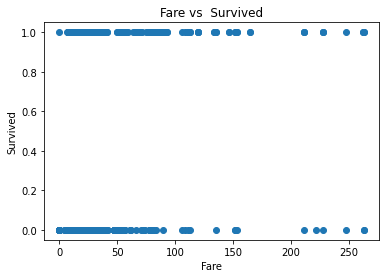

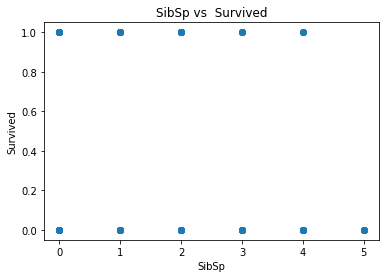

In [307]:
plt.scatter(titanic.Fare,titanic.Survived)
plt.title("Fare vs  Survived")
plt.xlabel("Fare")
plt.ylabel("Survived")
plt.show()

plt.scatter(titanic.SibSp,titanic.Survived)
plt.title("SibSp vs  Survived")
plt.xlabel("SibSp")
plt.ylabel("Survived")
plt.show()

In [0]:
from sklearn import tree
model=tree.DecisionTreeClassifier()

In [0]:
X_train=titanic[['Age','SibSp','Parch','Fare','Gender']]  
Y_train=titanic['Survived']

In [310]:
model.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [340]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=20, random_state=0)
cross_val_score(model,X_train,Y_train,cv=cv)

array([0.73033708, 0.74157303, 0.83146067, 0.7752809 , 0.84269663,
       0.74157303, 0.78651685, 0.76404494, 0.73033708, 0.78651685,
       0.78651685, 0.74157303, 0.80898876, 0.80898876, 0.76404494,
       0.75280899, 0.74157303, 0.76404494, 0.69662921, 0.66292135])

In [311]:
titanic.head(2)

,Survived,Age,SibSp,Parch,Fare,Gender
0,0,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0


In [312]:
Y=model.predict([[22.0,1,0,7.2500,1]])
Y

array([0])

In [313]:
Y=model.predict([[38,1,0, 71.28,0   ]])
Y

array([1])

In [327]:
from google.colab import files
uploaded = files.upload()


Saving test.csv to test (1).csv


In [0]:
X_test=pd.read_csv('test.csv')

In [329]:
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [330]:
from sklearn.preprocessing import LabelEncoder
make=LabelEncoder()
X_test['Gender']=make.fit_transform(X_test['Sex'])
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [331]:
X_test=X_test.drop(['PassengerId',"Pclass","Name","Sex","Cabin","Embarked","Ticket"],axis=1)
X_test.head()

,Age,SibSp,Parch,Fare,Gender
0,34.5,0,0,7.8292,1
1,47.0,1,0,7.0000,0
2,62.0,0,0,9.6875,1
3,27.0,0,0,8.6625,1
4,22.0,1,1,12.2875,0


In [332]:
X_test.isnull().sum()

Age       86
SibSp      0
Parch      0
Fare       1
Gender     0
dtype: int64

In [333]:
X_test['Age'].fillna((X_test['Age'].mean()),inplace=True)
X_test['Fare'].fillna((X_test['Fare'].median()),inplace=True)
X_test.isnull().sum()



Age       0
SibSp     0
Parch     0
Fare      0
Gender    0
dtype: int64

In [334]:
from google.colab import files
uploaded = files.upload()

Saving gender_submission.csv to gender_submission (4).csv


In [335]:
Y_test=pd.read_csv('gender_submission.csv')
Y_test.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [336]:
Y_test=Y_test.drop(['PassengerId'],axis=1)
Y_test.head()

,Survived
0,0
1,1
2,0
3,0
4,1


In [337]:
Y_pred=pd.DataFrame(model.predict(X_test))
Y_pred.head()

,0
0,0
1,0
2,1
3,1
4,0


In [338]:
model.score(X_test,Y_test)

0.777511961722488

In [339]:
Y_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       418 non-null    int64
dtypes: int64(1)
memory usage: 3.4 KB
